# Hierarchical clustering and dendrograms
* X dataset (n x m array) of points to cluster
* n number of data
* m number of features
* Z cluster link array with join information
* k number of clusters

In [1]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

(150, 2)


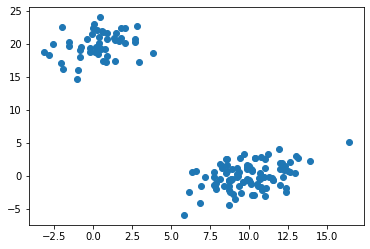

In [8]:
np.random.seed(4711)
a = np.random.multivariate_normal([10,0],[[3,1],[1,4]], size = [100,])
b = np.random.multivariate_normal([0,20], [[3,1],[1,4]], size = [50,])
X = np.concatenate((a,b))
print(X.shape)
plt.scatter(X[:,0], X[:,1])
plt.show()

In [9]:
Z = linkage(X, "ward")
Z

array([[5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00],
       [1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00],
       [3.30000000e+01, 6.80000000e+01, 7.10677929e-02, 2.00000000e+00],
       [1.70000000e+01, 7.30000000e+01, 7.13712071e-02, 2.00000000e+00],
       [1.00000000e+00, 8.00000000e+00, 7.54313099e-02, 2.00000000e+00],
       [8.50000000e+01, 9.50000000e+01, 1.09277896e-01, 2.00000000e+00],
       [1.08000000e+02, 1.31000000e+02, 1.10071548e-01, 2.00000000e+00],
       [9.00000000e+00, 6.60000000e+01, 1.13022407e-01, 2.00000000e+00],
       [1.50000000e+01, 6.90000000e+01, 1.14289714e-01, 2.00000000e+00],
       [6.30000000e+01, 9.80000000e+01, 1.21200766e-01, 2.00000000e+00],
       [1.07000000e+02, 1.15000000e+02, 1.21671017e-01, 2.00000000e+00],
       [6.50000000e+01, 7.40000000e+01, 1.24900190e-01, 2.00000000e+00],
       [5.80000000e+01, 6.10000000e+01, 1.40277358e-01, 2.00000000e+00],
       [6.20000000e+01, 1.52000000e+02, 1.72599535e

Cophenetic correlation coefficient: Compares the two-to-two distances of the samples with those that have been carried out with hierarchical clustering. The closer the value is to 1, the better the clustering will be, since it will preserve the original distances between the different observations.

In [10]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [11]:
c, coph_distance = cophenet(Z, pdist(X))
c

0.9800148387574268

We have a 98% conservation of the original distances with respect to the clusterings that have been generated.

In [12]:
Z[0]

array([5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00])

With Z[0] it tells us that data 52 and data 53 have a distance of 4.15105485e-02

In [13]:
Z[1]

array([1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00])

The next one that has been joined is 14 with 79, which have a distance of 5.91375926e-02

In [15]:
# Looking at the first 20 elements
Z[:20]

array([[5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00],
       [1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00],
       [3.30000000e+01, 6.80000000e+01, 7.10677929e-02, 2.00000000e+00],
       [1.70000000e+01, 7.30000000e+01, 7.13712071e-02, 2.00000000e+00],
       [1.00000000e+00, 8.00000000e+00, 7.54313099e-02, 2.00000000e+00],
       [8.50000000e+01, 9.50000000e+01, 1.09277896e-01, 2.00000000e+00],
       [1.08000000e+02, 1.31000000e+02, 1.10071548e-01, 2.00000000e+00],
       [9.00000000e+00, 6.60000000e+01, 1.13022407e-01, 2.00000000e+00],
       [1.50000000e+01, 6.90000000e+01, 1.14289714e-01, 2.00000000e+00],
       [6.30000000e+01, 9.80000000e+01, 1.21200766e-01, 2.00000000e+00],
       [1.07000000e+02, 1.15000000e+02, 1.21671017e-01, 2.00000000e+00],
       [6.50000000e+01, 7.40000000e+01, 1.24900190e-01, 2.00000000e+00],
       [5.80000000e+01, 6.10000000e+01, 1.40277358e-01, 2.00000000e+00],
       [6.20000000e+01, 1.52000000e+02, 1.72599535e

We can see that in [6.20000000e+01, 1.52000000e+02, 1.72599535e-01, 3.00000000e+00], element 152 appears (this cluster has already been formed from the originals because it is a number greater than the length of the array), that is why the number three appears, because in cluster 152 there are already two data, and by joining 62, we have this new cluster of 3 elements.

Let's see what cluster 152 contains:

In [22]:
Z[152-len(X)] # cluster 152

array([33.        , 68.        ,  0.07106779,  2.        ])

The next iteration we can see that joins 41 with 158. Who lives at 158?

In [28]:
Z[158-len(X)]

array([15.        , 69.        ,  0.11428971,  2.        ])

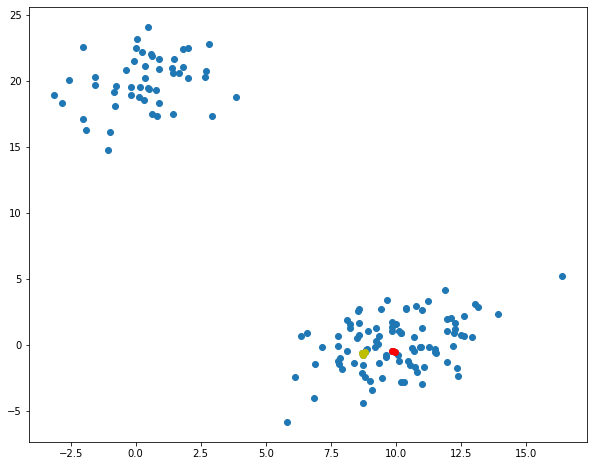

In [30]:
# The elements corresponding to cluster 152 are 33 and 68, the cluster 158 contains 15 and 69, we can see this points in a graph:
idx = [33, 68, 62]
idx2 = [15, 69, 41]
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1])
plt.scatter(X[idx, 0], X[idx,1], c = 'r') 
plt.scatter(X[idx2, 0], X[idx2,1], c = 'y')
plt.show()

### Graphic representation of a dendrogram